In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.metrics import Accuracy
import sklearn

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer



In [ ]:
import pandas as pd

In [ ]:
instagram_df_train=pd.read_csv('train.csv')

In [ ]:
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [ ]:
#load the testing data
instagram_df_test=pd.read_csv('test.csv')

In [ ]:
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [ ]:
instagram_df_train.head(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [ ]:
instagram_df_train.tail(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [ ]:
instagram_df_test.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
115,1,0.29,1,0.0,0,0,0,0,13,114,811,1
116,1,0.40,1,0.0,0,0,0,0,4,150,164,1
117,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.0,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.0,0,0,0,0,3,39,68,1


Exploratory Data Analysis

In [ ]:
# Getting DataFrame info
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
#Get the statistical summary of the DataFrame
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [ ]:
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
# Get the number of unique values in the "Profile Pic" feature
instagram_df_train['profile pic'].value_counts()

profile pic
1    404
0    172
Name: count, dtype: int64

In [ ]:
#Get the number of unique values in "Fake" (Target Column)
instagram_df_train['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

In [ ]:
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [ ]:
instagram_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [ ]:
instagram_df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
instagram_df_test['fake'].value_counts()

fake
0    60
1    60
Name: count, dtype: int64

Perform Data Visualization

<Axes: ylabel='count'>

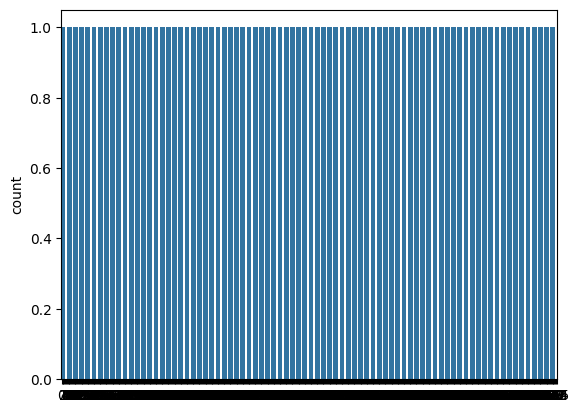

In [ ]:
#Visualize the data
sns.countplot(instagram_df_train['fake'])

<Axes: ylabel='count'>

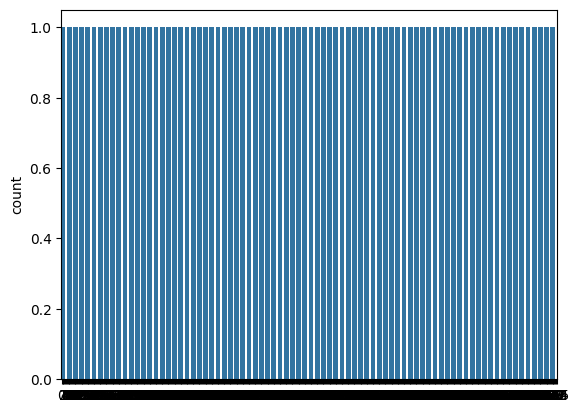

In [ ]:
# Visualize the private column data
sns.countplot(instagram_df_train['private'])

<Axes: ylabel='count'>

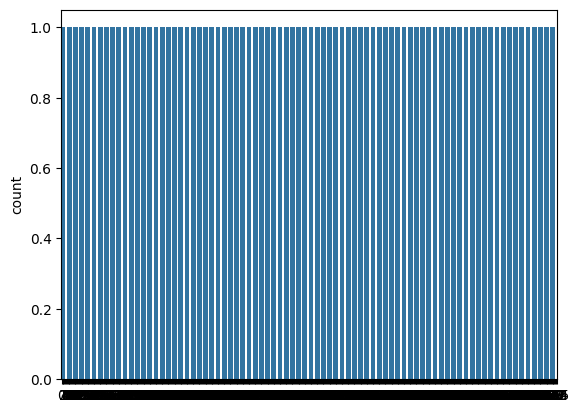

In [ ]:
#Visualize the 'Profile pic' Column data
sns.countplot(instagram_df_train['profile pic'])

<ipython-input-22-d77cc697d81b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(instagram_df_train['nums/length username'])


<Axes: xlabel='nums/length username', ylabel='Density'>

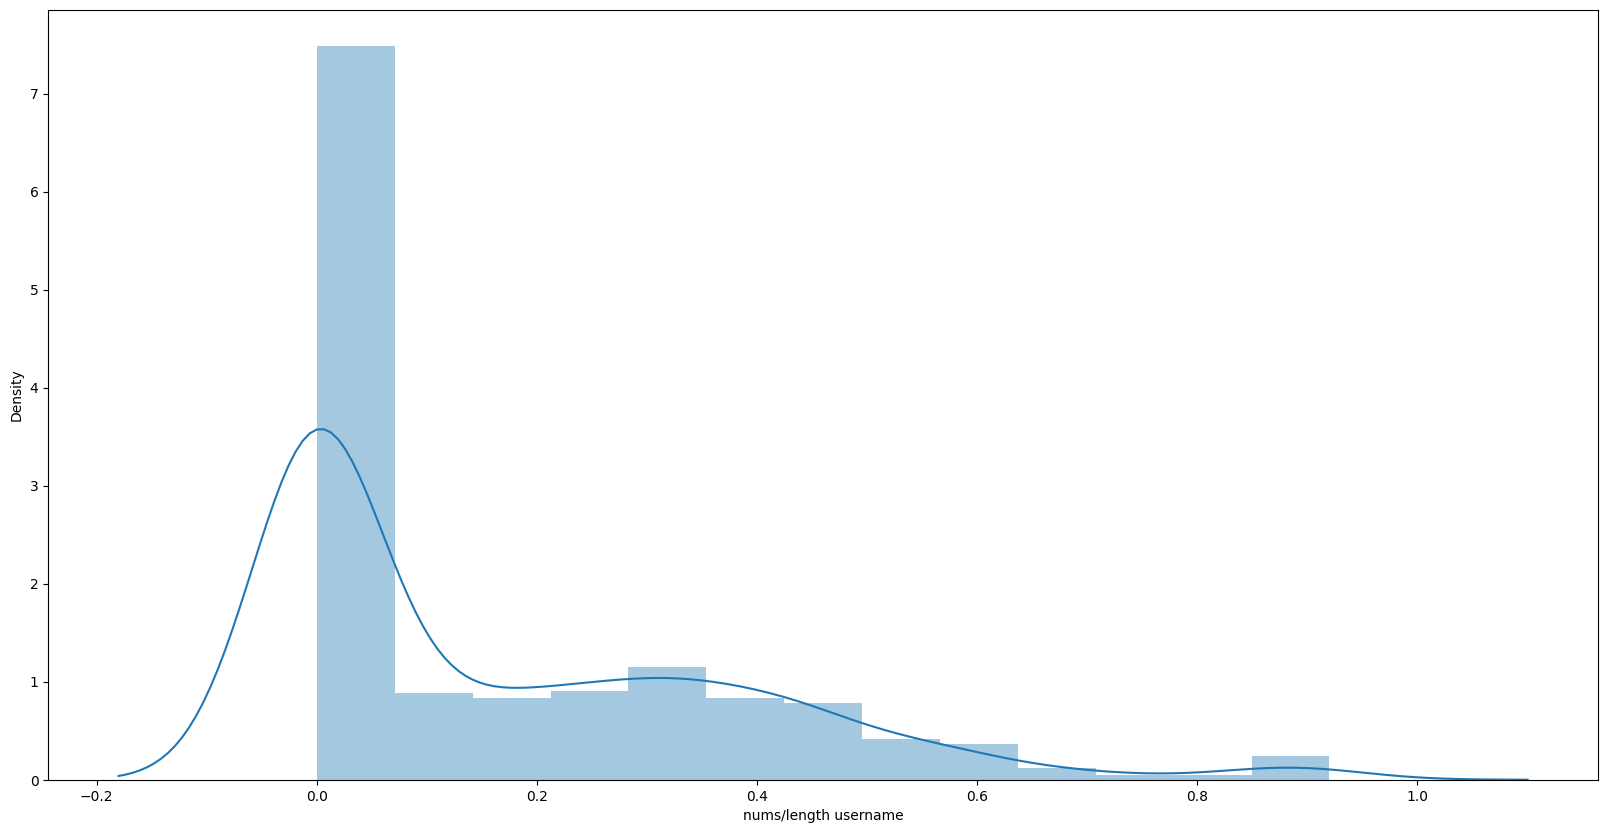

In [ ]:
# Visualize the data
plt.figure(figsize=(20,10))
sns.distplot(instagram_df_train['nums/length username'])

<Figure size 2000x2000 with 0 Axes>

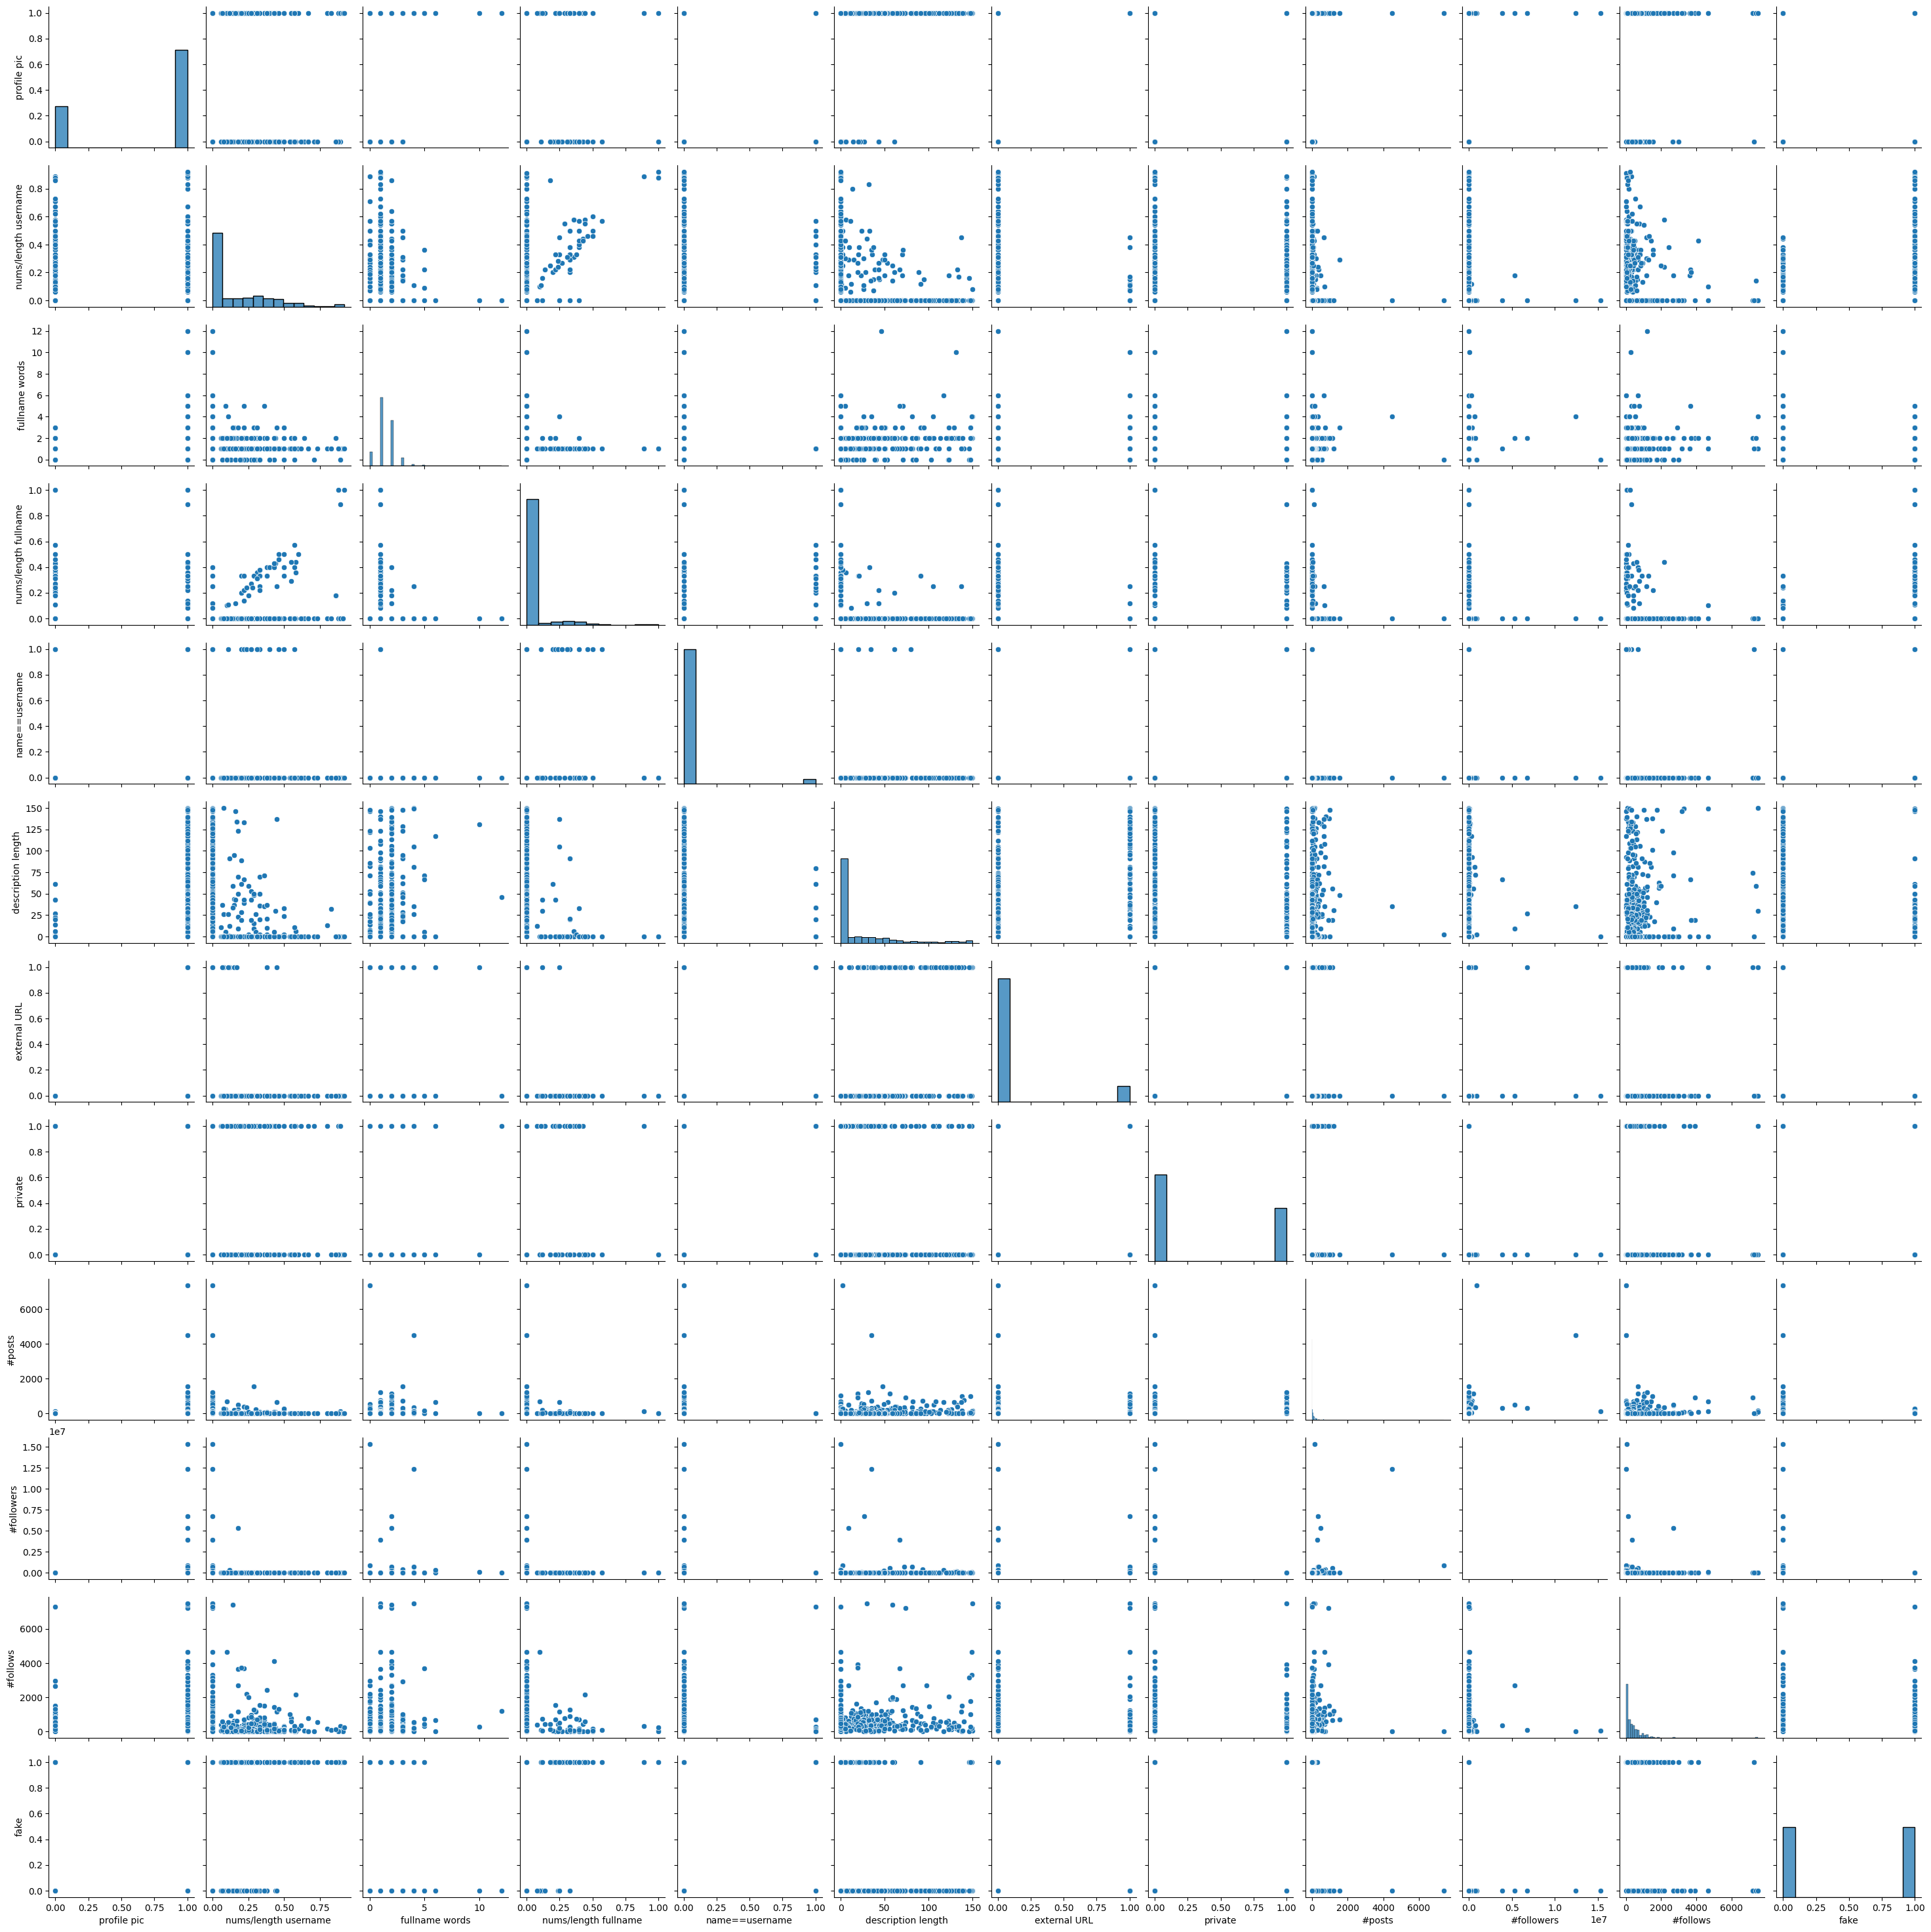

In [ ]:
#Plot a Pairplot
plt.figure(figsize=(20,20))
sns.pairplot(instagram_df_train)

<Figure size 2000x2000 with 0 Axes>

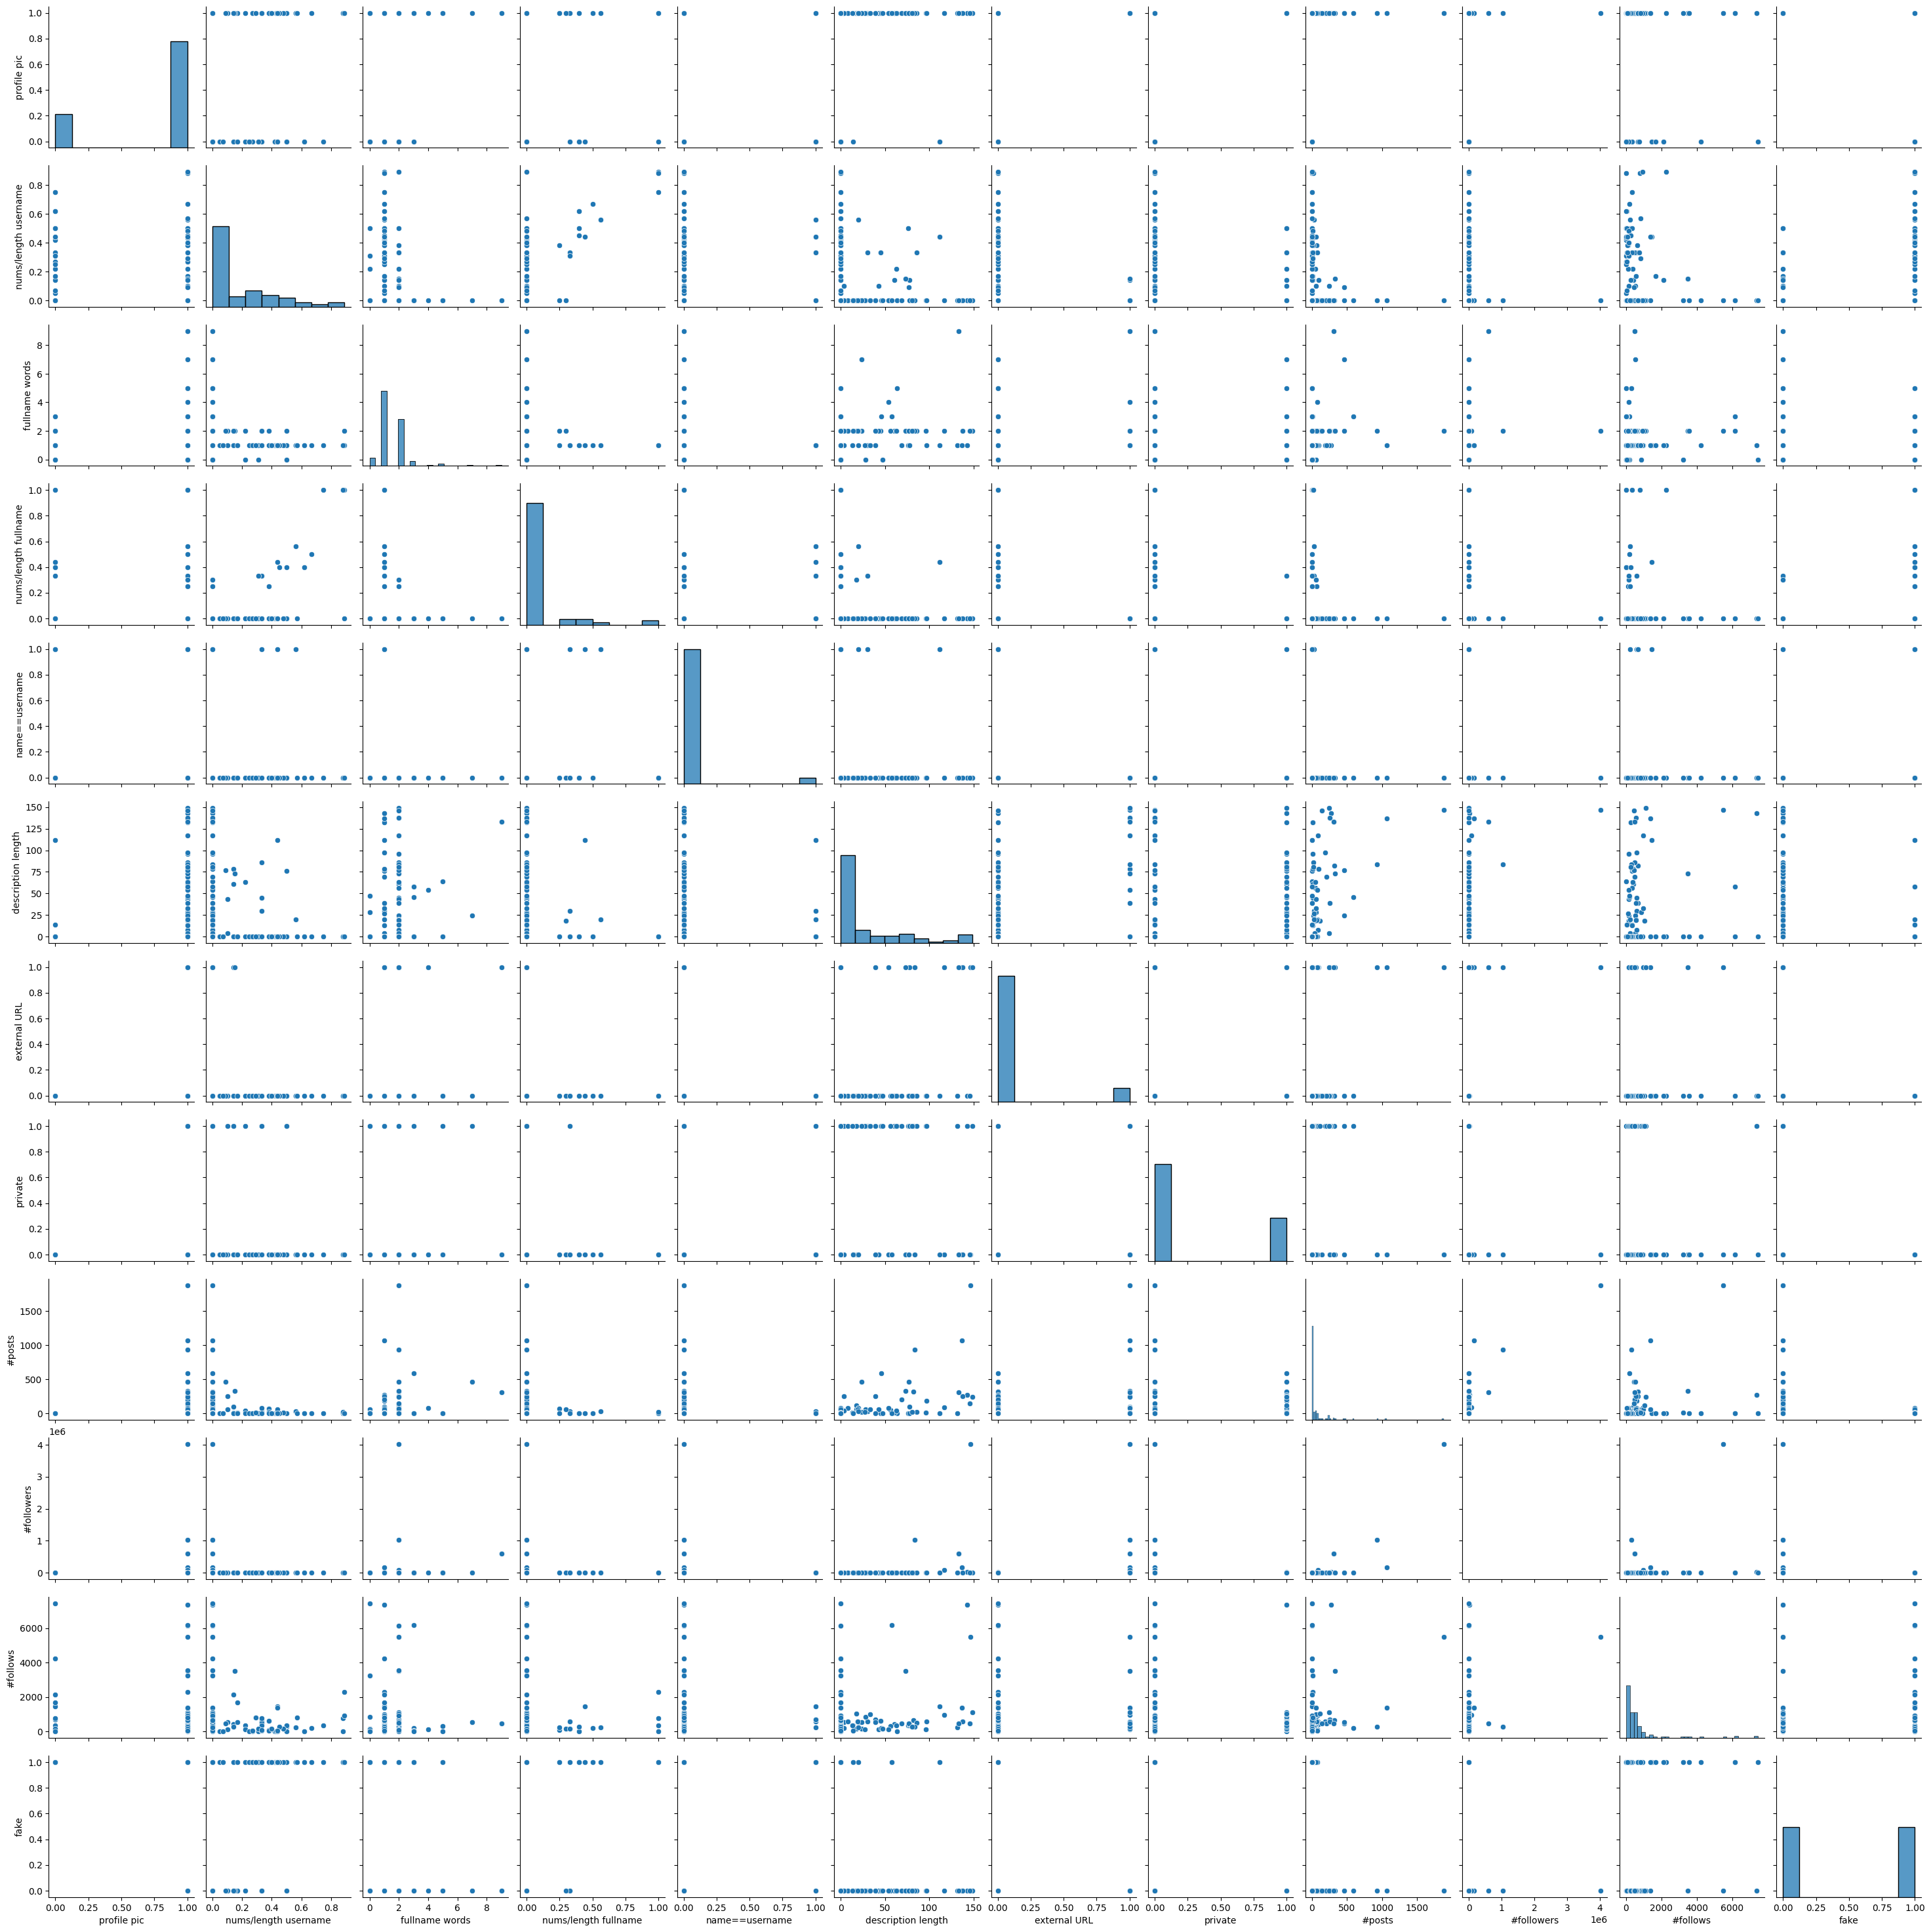

In [ ]:
#Plot a Pairplot
plt.figure(figsize=(20,20))
sns.pairplot(instagram_df_test)

<Axes: >

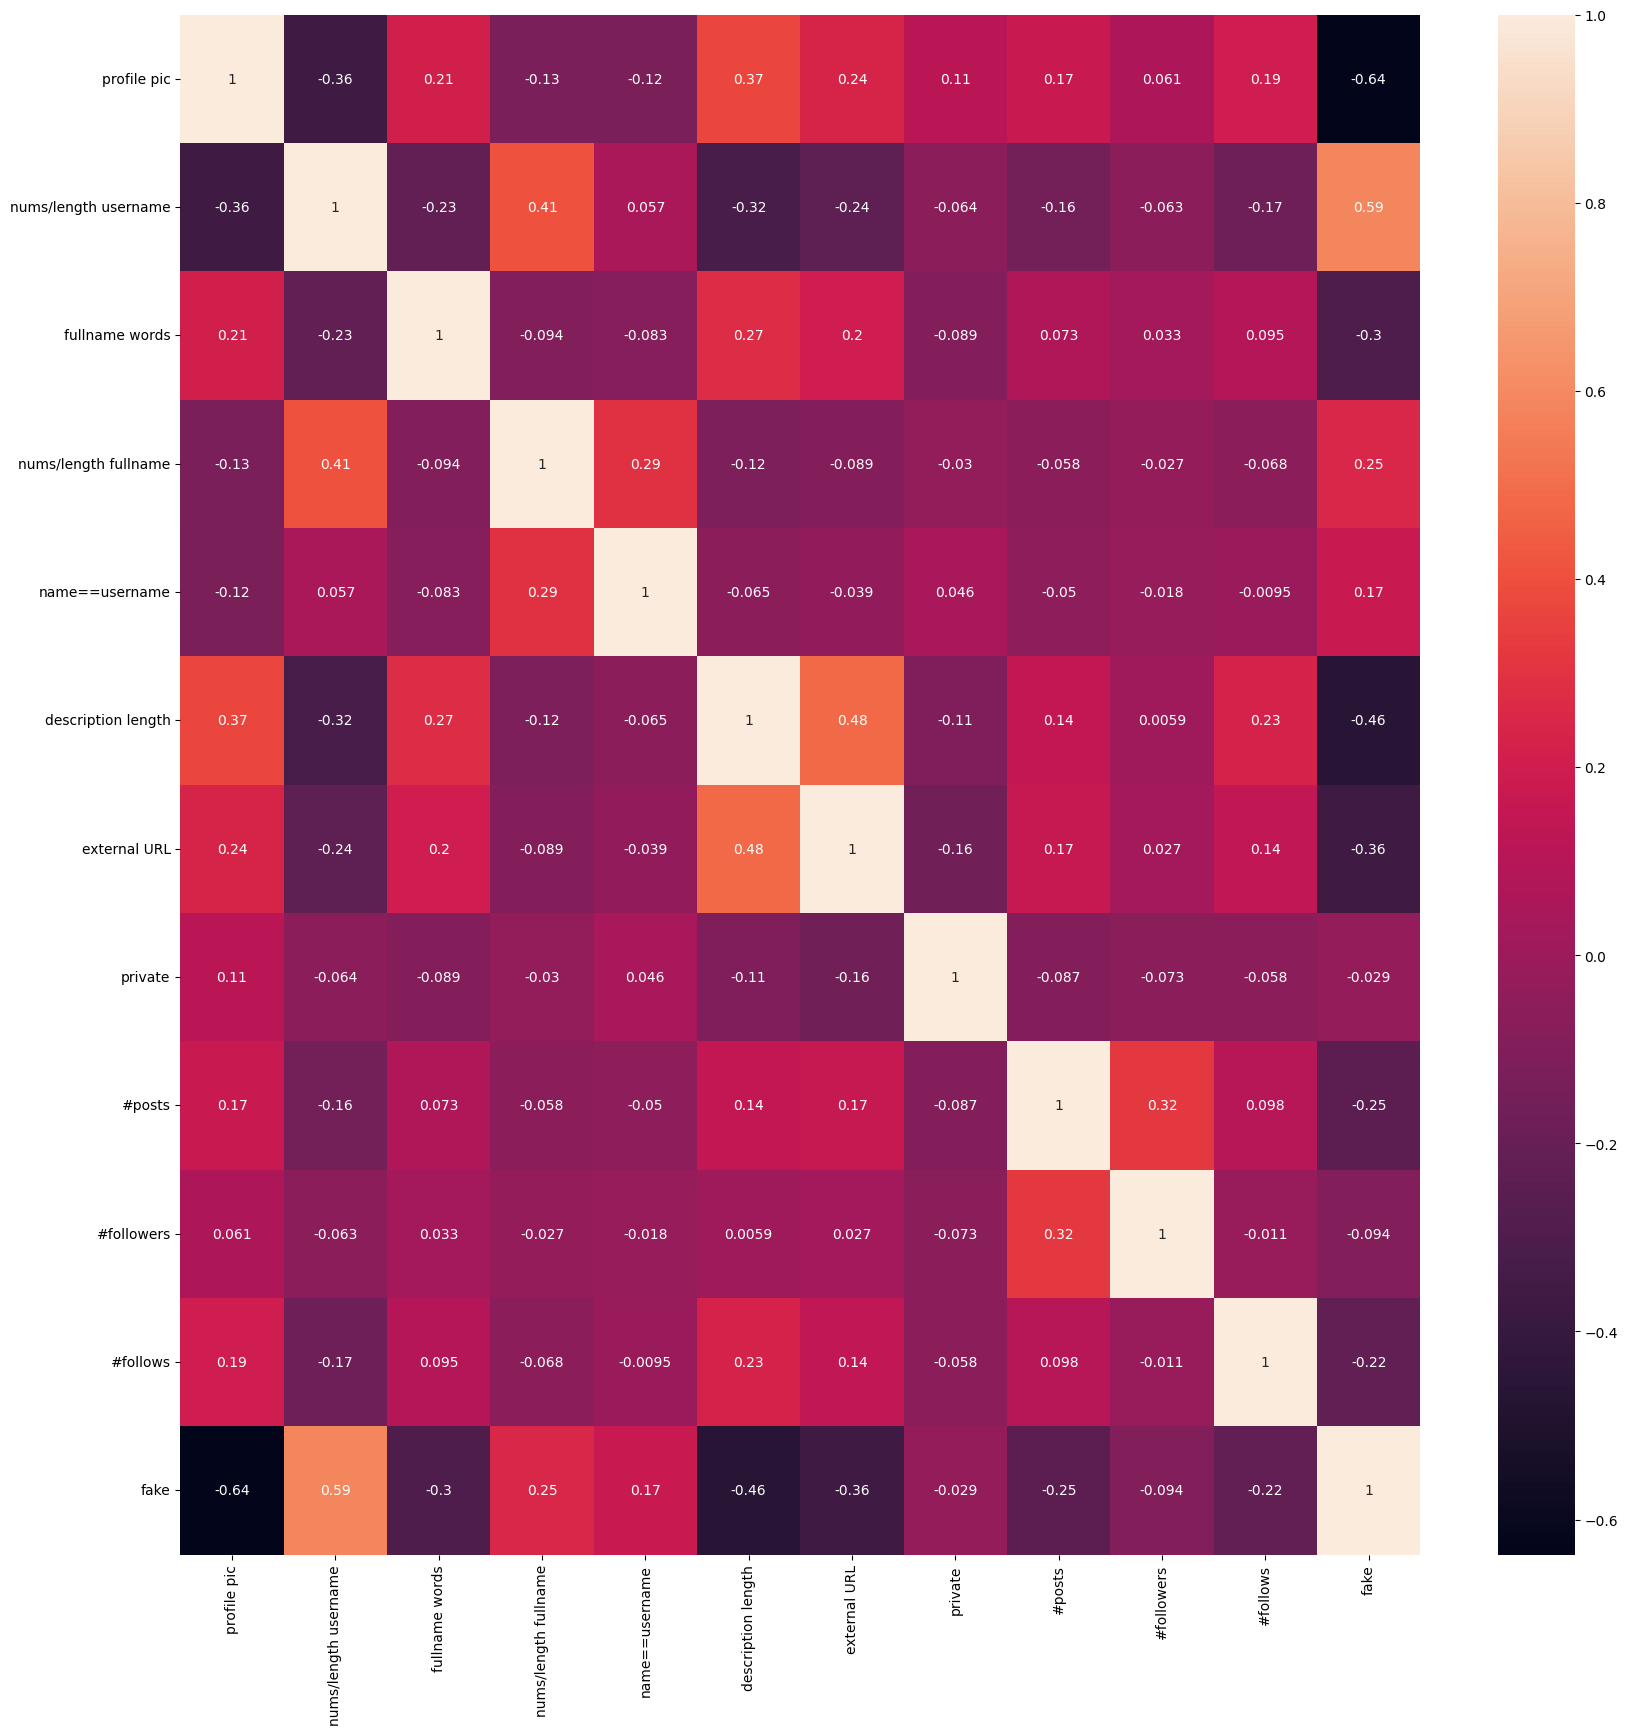

In [ ]:
# Correlation plot
plt.figure(figsize=(20,20))
cm=instagram_df_train.corr()
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

<Axes: >

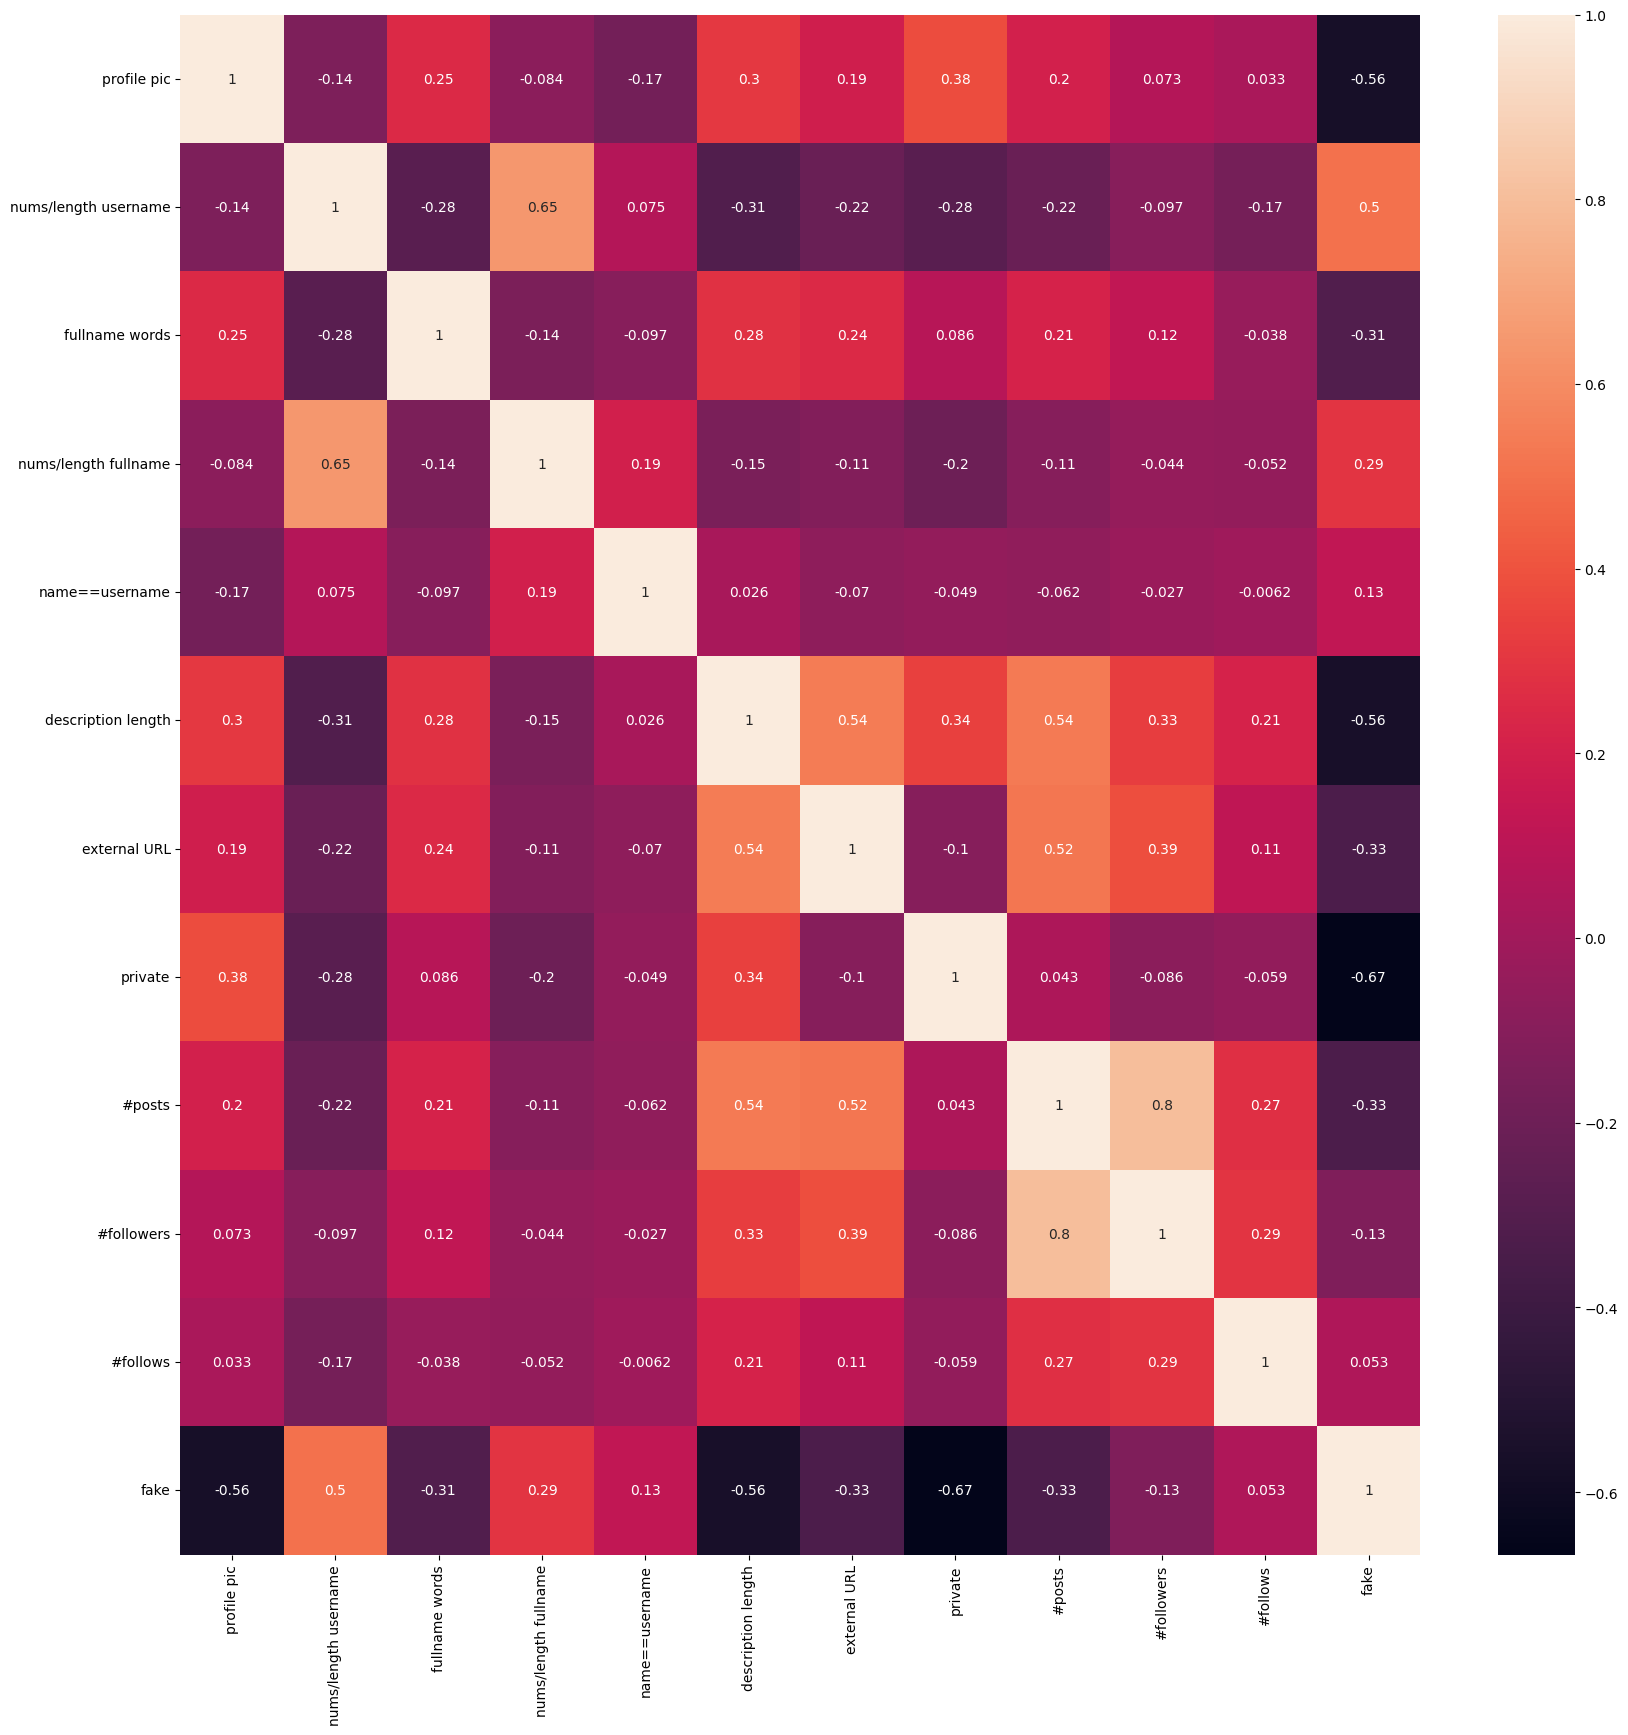

In [ ]:
# Correlation plot
plt.figure(figsize=(20,20))
cm=instagram_df_test.corr()
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

<Axes: ylabel='count'>

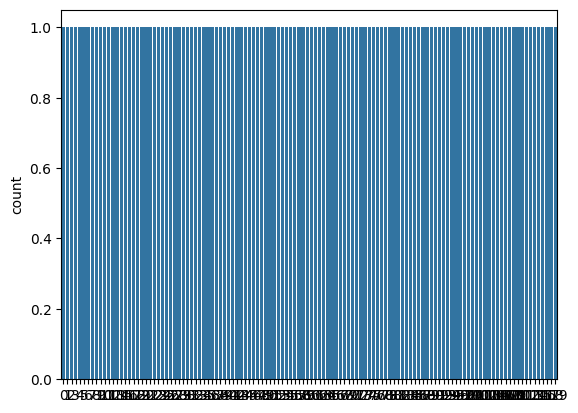

In [ ]:
sns.countplot(instagram_df_test['fake'])

<Axes: ylabel='count'>

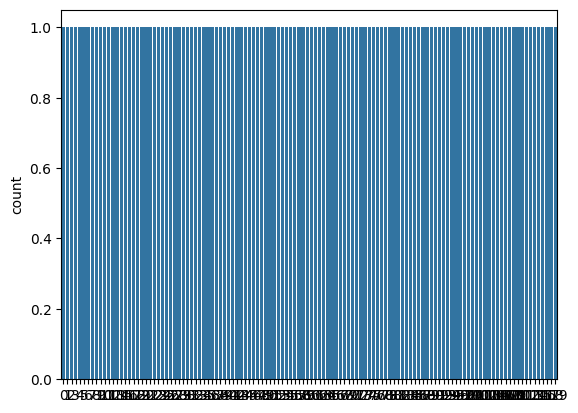

In [ ]:
sns.countplot(instagram_df_test['profile pic'])

<Axes: ylabel='count'>

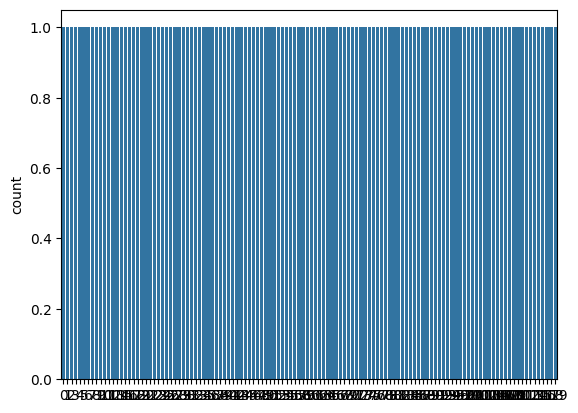

In [ ]:
sns.countplot(instagram_df_test['private'])

Task #5 Prepare the Data to Feed the Model¶

In [ ]:
# Training and Testing dataset(inputs)
xtrain=instagram_df_train.drop(columns=['fake'])

In [ ]:
xtrain

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [ ]:
xtest=instagram_df_test.drop(columns=['fake'])

In [ ]:
xtest

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [ ]:
#Training and Testing Dataset(Outputs)
ytrain=instagram_df_train['fake']

In [ ]:
ytrain

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [ ]:
ytest=instagram_df_test['fake']

In [ ]:
ytest

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [ ]:
#Scale the data before training the model
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
scalerx=StandardScaler()
xtrain=scalerx.fit_transform(xtrain)
xtest=scalerx.transform(xtest)

In [ ]:
xtrain

array([[ 0.65248952,  0.49629929, -1.38831247, ..., -0.18793216,
        -0.09271072,  0.48694486],
       [ 0.65248952, -0.76591601,  0.51339498, ...,  0.44440367,
        -0.09079728,  0.02684091],
       [ 0.65248952, -0.29842886,  0.51339498, ..., -0.23523287,
        -0.09363554, -0.44743686],
       ...,
       [ 0.65248952,  1.89876073,  0.51339498, ..., -0.25763847,
        -0.09370482, -0.18467607],
       [ 0.65248952,  1.89876073, -0.43745874, ..., -0.26759651,
        -0.09374771, -0.4746942 ],
       [ 0.65248952,  0.49629929, -0.43745874, ..., -0.26261749,
        -0.09364544, -0.0233126 ]])

In [ ]:
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [ ]:
ytrain=tf.keras.utils.to_categorical(ytrain,num_classes=2)
ytest=tf.keras.utils.to_categorical(ytest,num_classes=2)

In [ ]:
ytrain

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

MINI CHALLENGE #3

Print out the shapes of the training and testing datasets
What is the % of the training and testing datasets?

In [ ]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((576, 11), (120, 11), (576, 2), (120, 2))

In [ ]:
Training_data=(len(xtrain)/(len(xtrain)+len(xtest)))*100

In [ ]:
Training_data

82.75862068965517

In [ ]:
Test_data=(len(xtest)/(len(xtrain)+len(xtest)))*100

In [ ]:
Test_data

17.24137931034483

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
model=Sequential()
model.add(Dense(50,input_dim=11,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 dense_2 (Dense)             (None, 25)                3775      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 52        
                                                                 
Total params: 12077 (47.18 KB)
Trainable params: 12077 (

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs_hist=model.fit(xtrain,ytrain,epochs=20,verbose=1,validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 2s 26ms/step - loss: 0.5948 - accuracy: 0.7317 - val_loss: 0.3541 - val_accuracy: 0.9310
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4248 - accuracy: 0.8398 - val_loss: 0.2285 - val_accuracy: 0.9310
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3488 - accuracy: 0.8822 - val_loss: 0.1849 - val_accuracy: 0.9138
Epoch 4/20
17/17 [==============================] - 0s 5ms/step - loss: 0.2740 - accuracy: 0.8938 - val_loss: 0.1629 - val_accuracy: 0.8966
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2826 - accuracy: 0.8938 - val_loss: 0.1672 - val_accuracy: 0.8966
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2594 - accuracy: 0.9093 - val_loss: 0.1562 - val_accuracy: 0.9138
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2881 - accuracy: 0.9015 - val_loss: 0.1719 - val_accuracy: 0.8966
Epoch 8/20
17/17 [=

ASSESS THE PERFORMANCE OF TRAINED MODEL

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


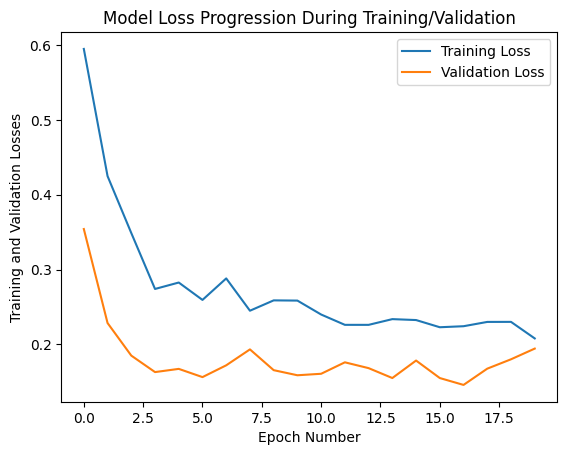

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss','Validation Loss'])

In [ ]:
predicted=model.predict(xtest)

4/4 [==============================] - 0s 3ms/step


In [ ]:
predicted

array([[1.37024396e-03, 9.98629749e-01],
       [9.76836205e-01, 2.31637284e-02],
       [9.77552176e-01, 2.24478114e-02],
       [9.86573875e-01, 1.34260617e-02],
       [3.55109155e-01, 6.44890845e-01],
       [8.79088581e-01, 1.20911345e-01],
       [8.79271567e-01, 1.20728441e-01],
       [9.52581704e-01, 4.74183150e-02],
       [9.33272958e-01, 6.67270198e-02],
       [8.87828708e-01, 1.12171285e-01],
       [9.01617229e-01, 9.83827412e-02],
       [9.96631861e-01, 3.36805102e-03],
       [8.81166935e-01, 1.18832983e-01],
       [6.68044686e-01, 3.31955254e-01],
       [8.47405076e-01, 1.52594894e-01],
       [9.54491436e-01, 4.55085933e-02],
       [6.96980655e-01, 3.03019285e-01],
       [9.45671141e-01, 5.43288663e-02],
       [9.92748320e-01, 7.25167105e-03],
       [9.75177824e-01, 2.48220805e-02],
       [3.51096466e-02, 9.64890361e-01],
       [8.52309406e-01, 1.47690579e-01],
       [8.20734084e-01, 1.79265827e-01],
       [9.52353179e-01, 4.76467982e-02],
       [9.030353

In [ ]:
predicted_value=[]
test=[]
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in ytest:
    test.append(np.argmax(i))

In [ ]:
print(classification_report(test,predicted_value))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90        60
           1       0.93      0.85      0.89        60

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



<Axes: >

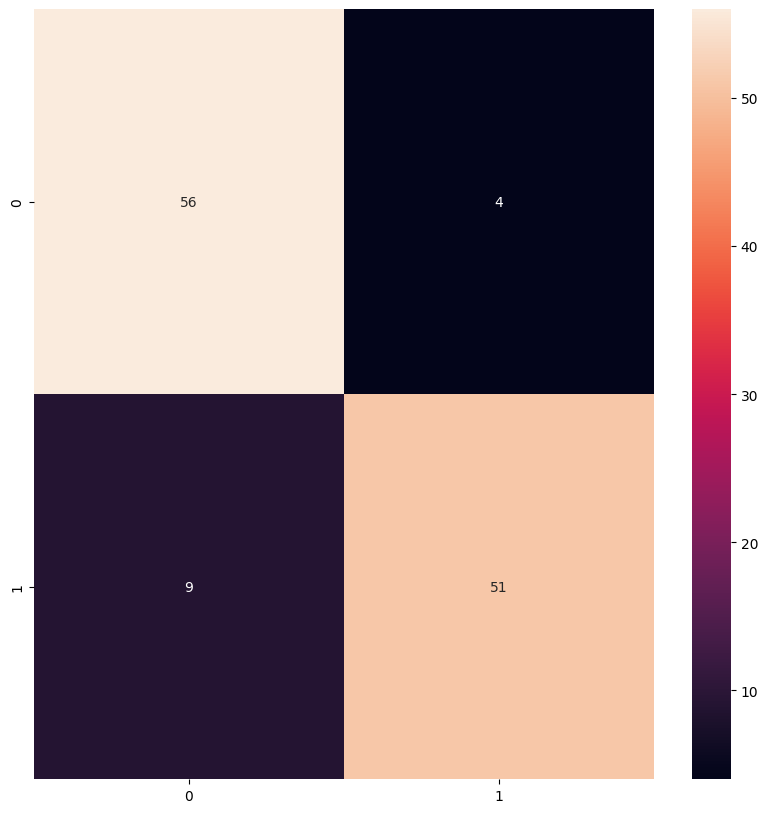

In [ ]:
plt.figure(figsize=(10,10))
cm=confusion_matrix(test,predicted_value)
sns.heatmap(cm,annot=True)

Basics done

TRAIN RANDOM FOREST CLASSIFIER

In [ ]:
# Import the necessary class from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
instagram_df_train = pd.read_csv('train.csv')
instagram_df_test = pd.read_csv('test.csv')

In [ ]:
X_train = instagram_df_train.drop('fake', axis=1)
y_train = instagram_df_train['fake']
X_test = instagram_df_test.drop('fake', axis=1)
y_test = instagram_df_test['fake']

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.93      0.90      0.92        60

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



Logisitic Regression

In [ ]:
# Instantiate the model
lr_model = LogisticRegression()

In [ ]:
# Train the model
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9083333333333333
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.90        60
           1       0.88      0.95      0.91        60

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



Support Vector Machines (SVM):

In [ ]:
# Instantiate the model
svm_model = SVC()

In [ ]:
# Train the model
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("SVM Classification Report:\n", classification_report(y_test, y_pred))

SVM Accuracy: 0.525
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.05      0.10        60
           1       0.51      1.00      0.68        60

    accuracy                           0.53       120
   macro avg       0.76      0.53      0.39       120
weighted avg       0.76      0.53      0.39       120



K-Nearest Neighbors (KNN):

In [ ]:
# Instantiate the model
knn_model = KNeighborsClassifier()

In [ ]:
# Train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test)

In [ ]:
# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("KNN Classification Report:\n", classification_report(y_test, y_pred))

KNN Accuracy: 0.8416666666666667
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        60
           1       0.87      0.80      0.83        60

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120



Naive Bayes:

In [ ]:
# Instantiate the model
nb_model = GaussianNB()

In [ ]:
# Train the model
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.6166666666666667
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.33      0.47        60
           1       0.57      0.90      0.70        60

    accuracy                           0.62       120
   macro avg       0.67      0.62      0.58       120
weighted avg       0.67      0.62      0.58       120



In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Decision Tree Classifier:

In [ ]:
# Instantiate the model
dt_model = DecisionTreeClassifier()

In [ ]:
# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.9
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        60
           1       0.90      0.90      0.90        60

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



Evaluating the best model


In [ ]:
# Define the models
models = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    SVC(kernel='rbf', probability=True),
    LogisticRegression(max_iter=10000),
    DecisionTreeClassifier(),
    MultinomialNB()
]

In [ ]:
# Define the hyperparameters for grid search
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto'],
    'logisticregression__C': [0.1, 1, 10],
    'multinomialnb__alpha': [0.1, 1, 10]
}

In [ ]:
# Define the models
models = [
    RandomForestClassifier(),
    SVC(),
    LogisticRegression(),
    DecisionTreeClassifier()
]


In [ ]:
# Define the hyperparameter space for each model
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
param_grid_svc = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

In [ ]:
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}


In [ ]:
param_grid_dt = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Perform grid search for each model
for model_name, model_class, param_grid in [('Random Forest', RandomForestClassifier, param_grid_rf), ('SVC', SVC, param_grid_svc), ('Logistic Regression', LogisticRegression, param_grid_lr), ('Decision Tree', DecisionTreeClassifier, param_grid_dt)]:
    model = model_class()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Score for {model_name}: {grid_search.best_score_}")
    print(f"Best Model for {model_name}: {grid_search.best_estimator_}")

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Score for Random Forest: 0.9374212893553224
Best Model for Random Forest: RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)


In [ ]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test Accuracy for the best model: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report for the best model:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix for the best model:\n{confusion_matrix(y_test, y_pred)}")


Test Accuracy for the best model: 0.8666666666666667
Classification Report for the best model:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        60
           1       0.92      0.80      0.86        60

    accuracy                           0.87       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.87      0.87      0.87       120

Confusion Matrix for the best model:
[[56  4]
 [12 48]]
The output you provided is the result of evaluating the best model on the test set. Here's a breakdown of what each line means:
Test Accuracy for the best model: 0.8666666666666667
This line shows the accuracy of the best model on the test set. The accuracy is the proportion of correctly classified instances out of all instances in the test set. In this case, the accuracy is 0.8666666666666667, which means that the model correctly classified approximately 86.67% of the instances in the test set.
Classification Report for the best model:
This table shows the precision, recall, and F1-score for each class in the test set. The classes are represented by the numbers 0 and 1.
Precision: The precision is the proportion of true positives (correctly classified instances) out of all positive predictions made by the model. In this case, the precision for class 0 is 0.82, which means that 82% of the instances predicted as class 0 were actually class 0.
Recall: The recall is the proportion of true positives out of all actual positive instances. In this case, the recall for class 0 is 0.93, which means that 93% of the actual class 0 instances were correctly classified.
F1-score: The F1-score is the harmonic mean of precision and recall. In this case, the F1-score for class 0 is 0.87, which means that the model's performance on class 0 is approximately 87%.
Support: The support is the number of instances in each class.
Confusion Matrix for the best model:
This matrix shows the number of true positives, false positives, true negatives, and false negatives for each class.
True Positives: The number of instances that were correctly classified as positive (class 1).
False Positives: The number of instances that were incorrectly classified as positive (class 1).
True Negatives: The number of instances that were correctly classified as negative (class 0).
False Negatives: The number of instances that were incorrectly classified as negative (class 0).
In this case, the confusion matrix is:
[[56  4]
 [12 48]]

This means that:
56 instances were correctly classified as class 0 (true negatives).
4 instances were incorrectly classified as class 0 (false positives).
12 instances were incorrectly classified as class 1 (false negatives).
48 instances were correctly classified as class 1 (true positives).
Overall, the best model has an accuracy of 0.8666666666666667, which means that it correctly classified approximately 86.67% of the instances in the test set. The model's performance on class 0 is better than on class 1, with a precision of 0.82 and a recall of 0.93.

Based on the output you provided, the best model among the ones evaluated is the Random Forest Classifier.
Here's a summary of the performance of the different models:
Random Forest Classifier
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Score: 0.9322188905547227
Test Accuracy: 0.8666666666666667
Classification Report:
Precision (class 0): 0.82
Recall (class 0): 0.93
F1-score (class 0): 0.87
Precision (class 1): 0.92
Recall (class 1): 0.80
F1-score (class 1): 0.86
Confusion Matrix:
True Negatives (class 0): 56
False Positives (class 0): 4
False Negatives (class 1): 12
True Positives (class 1): 48
The Random Forest Classifier has the highest best score of 0.9322188905547227, indicating that it performed the best on the validation set during the grid search. Additionally, it has the highest overall test accuracy of 0.8666666666666667, meaning it correctly classified approximately 86.67% of the instances in the test set.
The classification report and confusion matrix also show that the Random Forest Classifier has a good balance of precision and recall for both classes, with F1-scores around 0.87 for class 0 and 0.86 for class 1.
Therefore, based on the provided information, the Random Forest Classifier appears to be the best model among the ones evaluated and should be the model of choice for this problem.


Done